שם התלמיד


........................

# Google Colab notebook for teaching and practicing Keras for a regression problem

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

# **1. Generate Data**

In [ ]:
# Generate some random regression data
# X_train would be your features and y_train the corresponding continuous target values
X_train = np.random.random((100, 10))
y_train = np.random.random((100, 1))


In [ ]:
print(X_train.shape, y_train.shape)

(100, 10) (100, 1)


In [ ]:
print(y_train[0:10])

[[0.74911851]
 [0.95612504]
 [0.00772124]
 [0.48979668]
 [0.0623305 ]
 [0.41022096]
 [0.87291643]
 [0.53333693]
 [0.87367427]
 [0.66228029]]


In [ ]:
print(X_train[0:10,:])

[[0.82963313 0.30197854 0.19288741 0.42606634 0.05310859 0.01730569
  0.29775307 0.20384523 0.69518803 0.89910642]
 [0.95693446 0.9862539  0.14290862 0.80377485 0.3334667  0.20436921
  0.92347623 0.32343961 0.26556064 0.12718807]
 [0.02467357 0.27688284 0.14836032 0.0062021  0.29824866 0.82969275
  0.25195997 0.54108156 0.18106946 0.0439147 ]
 [0.25467272 0.81291101 0.4270534  0.15924122 0.26602152 0.89732436
  0.75337767 0.31564028 0.72428334 0.00107121]
 [0.37825051 0.37224727 0.17406821 0.65436322 0.31672619 0.01336487
  0.74183303 0.80465089 0.44725293 0.08104754]
 [0.205475   0.90005679 0.73478814 0.18964196 0.13351336 0.23521892
  0.04425593 0.82243498 0.63086238 0.64938363]
 [0.86976671 0.29027984 0.18931018 0.72765466 0.29250383 0.95925473
  0.39957089 0.48899032 0.25588251 0.8986364 ]
 [0.99119231 0.74548871 0.6812895  0.36977893 0.18701465 0.49862779
  0.61316965 0.97656232 0.23128604 0.71161599]
 [0.13623726 0.37724927 0.08645874 0.55274885 0.38220157 0.38927202
  0.0863479 

# **2. Creating a Network for Regression**

In part 2 we create a simple neural network model using Keras..
The `Sequential` model is a linear stack of layers.

1. **Sequential Model**:
   - `keras.Sequential()` initializes a linear stack of layers. This means that each layer has one input connected to the previous layer and one output connected to the next layer.

2. **First Dense Layer**:
   - `layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],))` adds the first dense (fully connected) layer to the model.
   - `64` is the number of neurons or units in this layer. The more neurons you have, the more complex patterns in data your model can learn, but it also makes your model larger and potentially more prone to overfitting.
   - `activation='relu'` applies the ReLU (Rectified Linear Unit) activation function to the output of each neuron in this layer. ReLU is commonly used in hidden layers of neural networks because it introduces non-linearity to the model, allowing it to learn more complex functions.
   - `input_shape=(X_train.shape[1],)` specifies the shape of the input data which the model should expect. Here, `X_train.shape[1]` refers to the number of features in the training data. The `input_shape` argument is only needed for the first layer so that the model knows the number of inputs to expect. For example, if your training data (`X_train`) has 10 features, then `X_train.shape[1]` would be 10, and the input shape would be set as `(10,)`.

3. **Second Dense Layer**:
   - `layers.Dense(64, activation='relu')` adds another dense layer with the same configuration as the first. This layer will take inputs from all 64 neurons of the first dense layer.

4. **Output Dense Layer**:
   - `layers.Dense(1)` adds the output layer to the model with a single neuron. Since this is a regression task, you typically do not use an activation function in the output layer, as the regression tasks are about predicting continuous values, and you want the output to be able to take on any value.

The model is now a fully connected neural network with two hidden layers (each with 64 neurons and ReLU activation) and an output layer designed for regression (with a single neuron and no activation function).

In [ ]:
# Build a simple model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression (no activation function)
])

# **3. Training the Network**

## **3.1 model.compile:**

In this section you are specifying the optimizer and loss function that the model will use during the training process. Compiling the model with the Adam optimizer and mean squared error loss sets up the model for training on a regression task. The optimizer will iteratively adjust the weights to minimize the mean squared error between the model's predictions and the actual data.

1. **Optimizer (`optimizer='adam'`)**:
   - The optimizer is an algorithm or method used to change the attributes of the neural network such as weights and learning rate in order to reduce the losses. Optimizers are used to minimize (or maximize) a function which is usually the loss function that measures how wrong the model's predictions are.
   - `'adam'` refers to the Adam optimizer, which is a popular optimization algorithm in deep learning. Adam stands for Adaptive Moment Estimation and combines the benefits of two other extensions of stochastic gradient descent: Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp). Specifically, it keeps an exponentially decaying average of past gradients (momentum) and uses the concept of adaptive learning rates (different rates for different parameters).

2. **Loss Function (`loss='mean_squared_error'`)**:
   - The loss function, also known as cost function, is a method of evaluating how well the algorithm models the dataset. If predictions deviate too far from actual results, loss function would output a very high value. Loss function maps decisions to their associated costs.
   - `'mean_squared_error'` is a common loss function used for regression problems. It calculates the average of the squares of the errors, which is the difference between the predicted values and the actual values. The equation for mean squared error (MSE) is:

     \[ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^2 \]

     where \( y_{i} \) is the true value and \( \hat{y}_{i} \) is the predicted value.
   - This loss function is chosen for regression problems because it works well when the target variable continues, and you want to penalize the model more for larger errors (since the errors are squared, larger errors have a disproportionately larger effect on the loss).

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

## **3.2 model.fit:**

When `model.fit()` is called, the following occurs:

- The model begins to iterate over the training data in batches of 32 samples, calculating the predictions based on the current state of the model weights and the input features.
- The predictions are compared to the true target values, and the loss is calculated using the mean squared error function.
- The optimizer (Adam, as previously set in `model.compile()`) updates the model weights in an attempt to minimize the loss.
- These steps repeat for each batch until one epoch is completed.
- After all batches are processed, one epoch is finished. The process then repeats for the number of epochs specified (10 in this case).

At the end of training, the model will have learned weights that minimize the loss function, to the best of its ability, over the training dataset.

1. **Training Data (`X_train`, `y_train`)**:
   - `X_train` represents the input features of your training data. This is the data that your model will learn from.
   - `y_train` represents the corresponding target values for the training set. These are the true values that the model is trying to predict.

2. **Number of Epochs (`epochs=10`)**:
   - An epoch is one complete pass through the entire training dataset.
   - `epochs=10` means that the model will iterate over the entire training dataset 10 times. With each epoch, the model weights will be updated in an attempt to minimize the loss function.

3. **Batch Size (`batch_size=32`)**:
   - Training data is typically divided into smaller subsets that are fed into the model sequentially, known as batches.
   - `batch_size=32` means that 32 samples from the training dataset will be used to train the model at each step. The model's weights will be updated after each batch of 32 samples has been processed.
   - Smaller batch sizes generally lead to a greater regularization effect and more noise in the learning process, which can be beneficial for finding more generalizable patterns. However, they can also make the training process slower and potentially less stable. Conversely, larger batch sizes provide a more accurate estimate of the gradient, but they can be computationally more expensive and might lead to sharper minima in the loss function, which can be less generalizable.



In [ ]:
# Train the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
4/4 [==============================] - 1s 8ms/step - loss: 0.4789
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 0.2720
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1556
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1038
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1014
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1152
Epoch 7/10
4/4 [==============================] - 0s 6ms/step - loss: 0.1160
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1047
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0956
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0919


# **4. Network Output**

## **4.1 the W&b 's**

In Keras, the model parameters (weights and biases) are stored within the layers of the model. After training your model with `.fit()`, the learned weights and biases are stored in the model's layers and can be accessed or manipulated if needed.

For each layer in a Keras model, there are two main sets of parameters:

- **Weights (w)**: These are the parameters that the model learns during training and are used to make predictions. They represent the strength of the connection between units in layers.

- **Biases (b)**: These are also learned during training and are used to shift the activation function to the left or right, which helps the model make better predictions.

In [ ]:
#print w,b shape in each layer
i=0
for layer in model.layers:
    i=i+1
    weights, biases = layer.get_weights()
    print("w", str(i), weights.shape, ";b", str(i), biases.shape)


w 1 (10, 64) ;b 1 (64,)
w 2 (64, 64) ;b 2 (64,)
w 3 (64, 1) ;b 3 (1,)


## **4.2 history object**

The `History` object in Keras, which is returned by the `model.fit()` method, holds a record of the loss values and metric values during training. It has the following main attribute:

- **`history`**: A dictionary containing the loss values and metrics values at the end of each epoch. The keys in this dictionary depend on the metrics that were specified during the model compilation.

In [ ]:
print(model_history.history.keys())

dict_keys(['loss'])


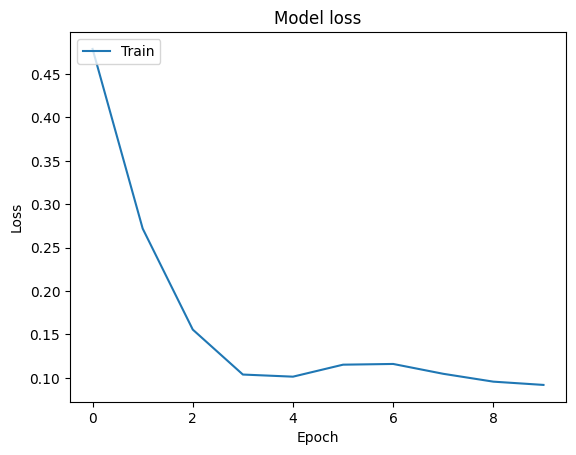

In [ ]:
# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


# **5. Evaluation**

In part 5, the focus is on evaluating the performance of the neural network model. The model.evaluate() function in Keras is used for this purpose.

In [ ]:
# Evaluate the model
model_loss = model.evaluate(X_train, y_train)
print(f'model_loss: {model_loss}')

4/4 [==============================] - 0s 3ms/step - loss: 0.0781
model_loss: 0.07810601592063904


# Exercise1: california Housing Prediction

# 1.1 Imports
Let's use the california Housing dataset, which is a commonly used dataset for regression problems. It contains information about various houses in california suburbs and is aimed at predicting the median value of homes in $1000s.
We'll use scikit-learn to load the dataset.
Pandas for data manipulation.
Matplotlib for plotting.
We'll split the data into training, validation, and test sets, then build a model with Keras to predict house prices.
We'll plot the loss over epochs for the training and validation sets.
The loss function we'll use is Mean Squared Error (MSE), a common choice for regression.



First, let's import more libraries:

```
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
```

In [ ]:
# Ex1.1 Imports
# YOUR CODE HERE - START


## YOUR CODE HERE - END

# 1.2 Load California Housing dataset
```
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
target = pd.DataFrame(california_housing.target, columns=["MedianHouseValue"])

```


In [ ]:
# Ex1.2 Load california Housing dataset
# YOUR CODE HERE - START


## YOUR CODE HERE - END

# 1.3 Standardize the data

Use ```StandardScaler``` and ```scaler.fit_transform``` to scale your data.values

save the scaled data into: ```X_scaled``` matrix

In [ ]:
# Ex1.3 Split the data
# YOUR CODE HERE - START


## YOUR CODE HERE - END


# 1.4 Split the data into training, validation, and test sets

Use ```train_test_split``` to split the data into:

X_train, y_train (70%), X_val, y_val (15%), X_test, y_test (15%)

- first line:
train - 70%, temp - 30%
- second line:
val 15%, test 15%


In [ ]:
# Ex1.4 Split the data
# YOUR CODE HERE - START



## YOUR CODE HERE - END

In [ ]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(14448, 8) (14448, 1) (3096, 8) (3096, 1) (3096, 8) (3096, 1)


The split data shapes are:

```(14448, 8) (14448, 1) (3096, 8) (3096, 1) (3096, 8) (3096, 1)```

# 1.5 Create & Train the model

Create Dense Sequential Network with:
- Input layer X_train.shape[1] neurons
- first hidden layer with 64 neurons & relu activation function
- second hidden layer with 64 neurons & relu activation function
- Output layer for regression with one neuron

Compile the model with 'adam' optimizer and 'mean_squared_error' as a loss function

Train the model with X_train, y_train, 20 epochs and batch_size=32


In [ ]:
# Ex1.5 Create & Train the model
# Build the model
# YOUR CODE HERE - START


# YOUR CODE HERE - END

Epoch 1/20
452/452 [==============================] - 5s 3ms/step - loss: 1.2676 - val_loss: 0.4400
Epoch 2/20
452/452 [==============================] - 1s 2ms/step - loss: 0.3967 - val_loss: 0.3986
Epoch 3/20
452/452 [==============================] - 1s 3ms/step - loss: 0.3802 - val_loss: 0.3828
Epoch 4/20
452/452 [==============================] - 1s 2ms/step - loss: 0.3934 - val_loss: 0.3716
Epoch 5/20
452/452 [==============================] - 1s 2ms/step - loss: 0.3359 - val_loss: 0.3486
Epoch 6/20
452/452 [==============================] - 1s 3ms/step - loss: 0.3497 - val_loss: 0.3402
Epoch 7/20
452/452 [==============================] - 1s 2ms/step - loss: 0.3374 - val_loss: 0.3474
Epoch 8/20
452/452 [==============================] - 1s 3ms/step - loss: 0.3110 - val_loss: 0.3440
Epoch 9/20
452/452 [==============================] - 2s 4ms/step - loss: 0.3252 - val_loss: 0.3331
Epoch 10/20
452/452 [==============================] - 2s 4ms/step - loss: 0.3210 - val_loss: 0.3471

# 1.6 plotting the training and validation loss over epochs

```python
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
```


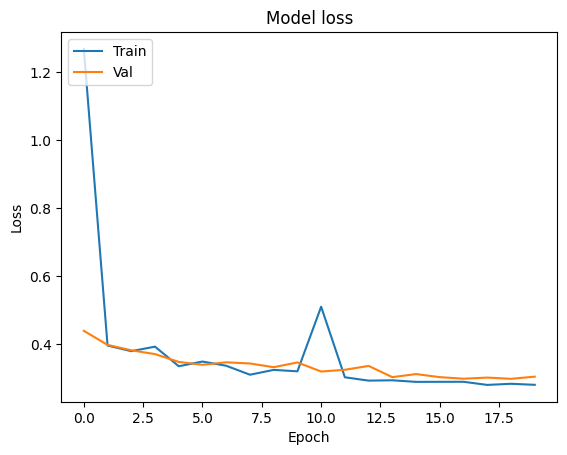

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 1.7 Evaluation
**Mean squared error (MSE)**,which reflects how well the model is able to predict the median house values for the unseen data in the test set. A lower MSE indicates that the model's predictions are closer to the actual values.
**Mean absolute error (MAE)** or **root mean squared error (RMSE)**, you can calculate them using the predictions from the model and comparing them to the actual values. Here's how you can calculate and print these additional metrics:

```python
# Calculate MSE
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate RMSE (the square root of MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
```

In [ ]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

97/97 [==============================] - 0s 2ms/step


In [ ]:
# Calculate MSE
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate RMSE (the square root of MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

97/97 [==============================] - 0s 2ms/step - loss: 0.2827
Test Loss (MSE): 0.2827311158180237
Mean Squared Error (MSE): 0.28273106260434816
Mean Absolute Error (MAE): 0.37122925558085895
Root Mean Squared Error (RMSE): 0.5317246116217945


**correlation coefficient**
The correlation coefficient measures the strength and direction of the linear relationship between two variables, with a value ranging from -1 to 1. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. A value around 0 indicates no linear correlation.


To calculate and plot the correlation coefficient between the actual and predicted values from your model, you can use NumPy for the calculation and matplotlib for plotting. The correlation coefficient measures the strength and direction of the linear relationship between two variables, with a value ranging from -1 to 1. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. A value around 0 indicates no linear correlation.

In this code:
- We first ensure that both `y_test` and `y_pred` are flattened to 1D arrays to compute the correlation correctly.
- We use `np.corrcoef()` to calculate the Pearson correlation coefficient matrix between the actual and predicted values. The `[0, 1]` element of this matrix gives us the correlation coefficient between the two sets of values.
- Finally, we plot the actual values against the predicted values using `plt.scatter()`, and include the correlation coefficient in the plot title for reference.

This plot will help visualize how well the predicted values from your model match the actual values, with the correlation coefficient providing a numerical summary of this relationship.

In [ ]:
# Flatten y_pred if it's not already a 1D array (common for Keras models)
y_pred_flat = y_pred.flatten()

# Calculate the Pearson correlation coefficient
correlation_matrix = np.corrcoef(y_test.flatten(), y_pred_flat)
correlation_coefficient = correlation_matrix[0, 1]

print(f"Correlation Coefficient: {correlation_coefficient}")

# Plotting the actual vs predicted values with the correlation coefficient
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_flat, alpha=0.5)
plt.title(f"Actual vs. Predicted Values\nCorrelation Coefficient: {correlation_coefficient:.2f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


In [ ]:
# Ex1.7
# Calculate and plot the correlation coefficient between the actual and predicted values of
# The train set
# YOUR CODE HERE - START


# YOUR CODE HERE - END

By: Merav Varsano for M'aala (Davidson Ins.) ©